In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Iris Flower Classification

In [9]:
df=pd.read_csv('C:/Users/egala/OneDrive/Desktop/Data_Science_Internship_at_CodeAlpha/Iris.csv')
df

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.sample(5)

,Id,sepal_length,sepal_width,petal_length,petal_width,species
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df['species']=df['species'].str.replace('Iris-','')

In [17]:
df.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
#Sepal Length & Width

Text(0, 0.5, 'Length/Width')

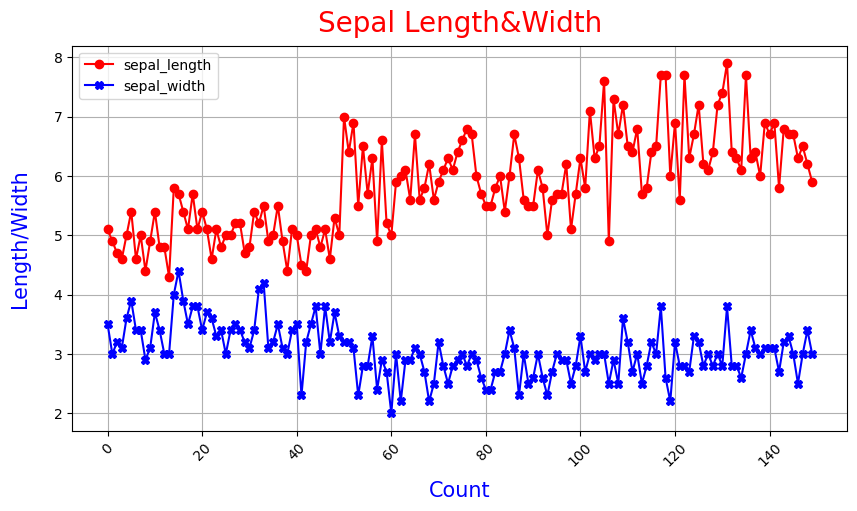

In [21]:
df['sepal_length'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)
df['sepal_width'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [23]:
#Sepal length is greater then Sepal width

Text(0, 0.5, 'Length/Width')

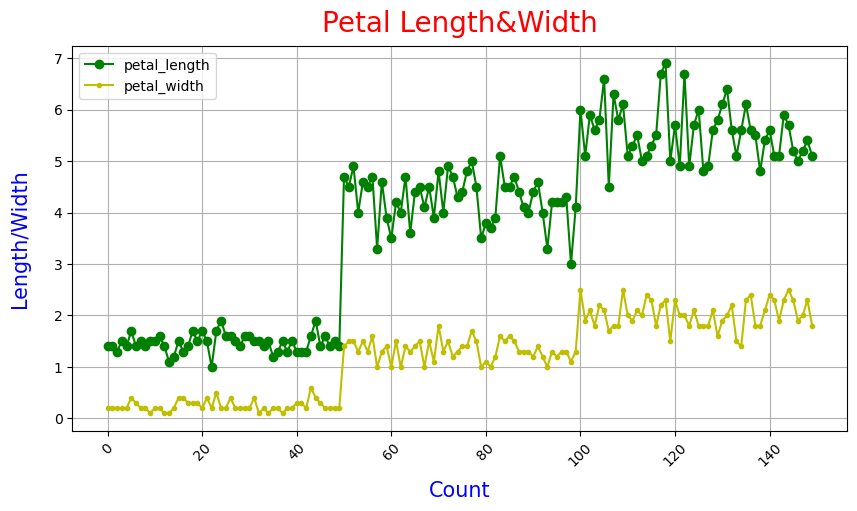

In [25]:
df['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [27]:
#Petal length is greater then Petal width

Text(0, 0.5, 'Length/Width')

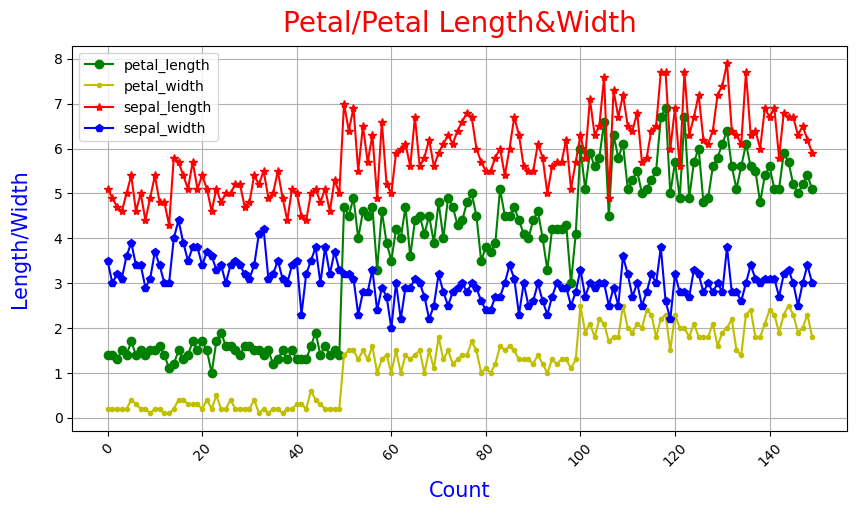

In [29]:
df['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
df['sepal_length'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
df['sepal_width'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Petal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

In [31]:
#Data Visualization

<Figure size 1700x600 with 0 Axes>

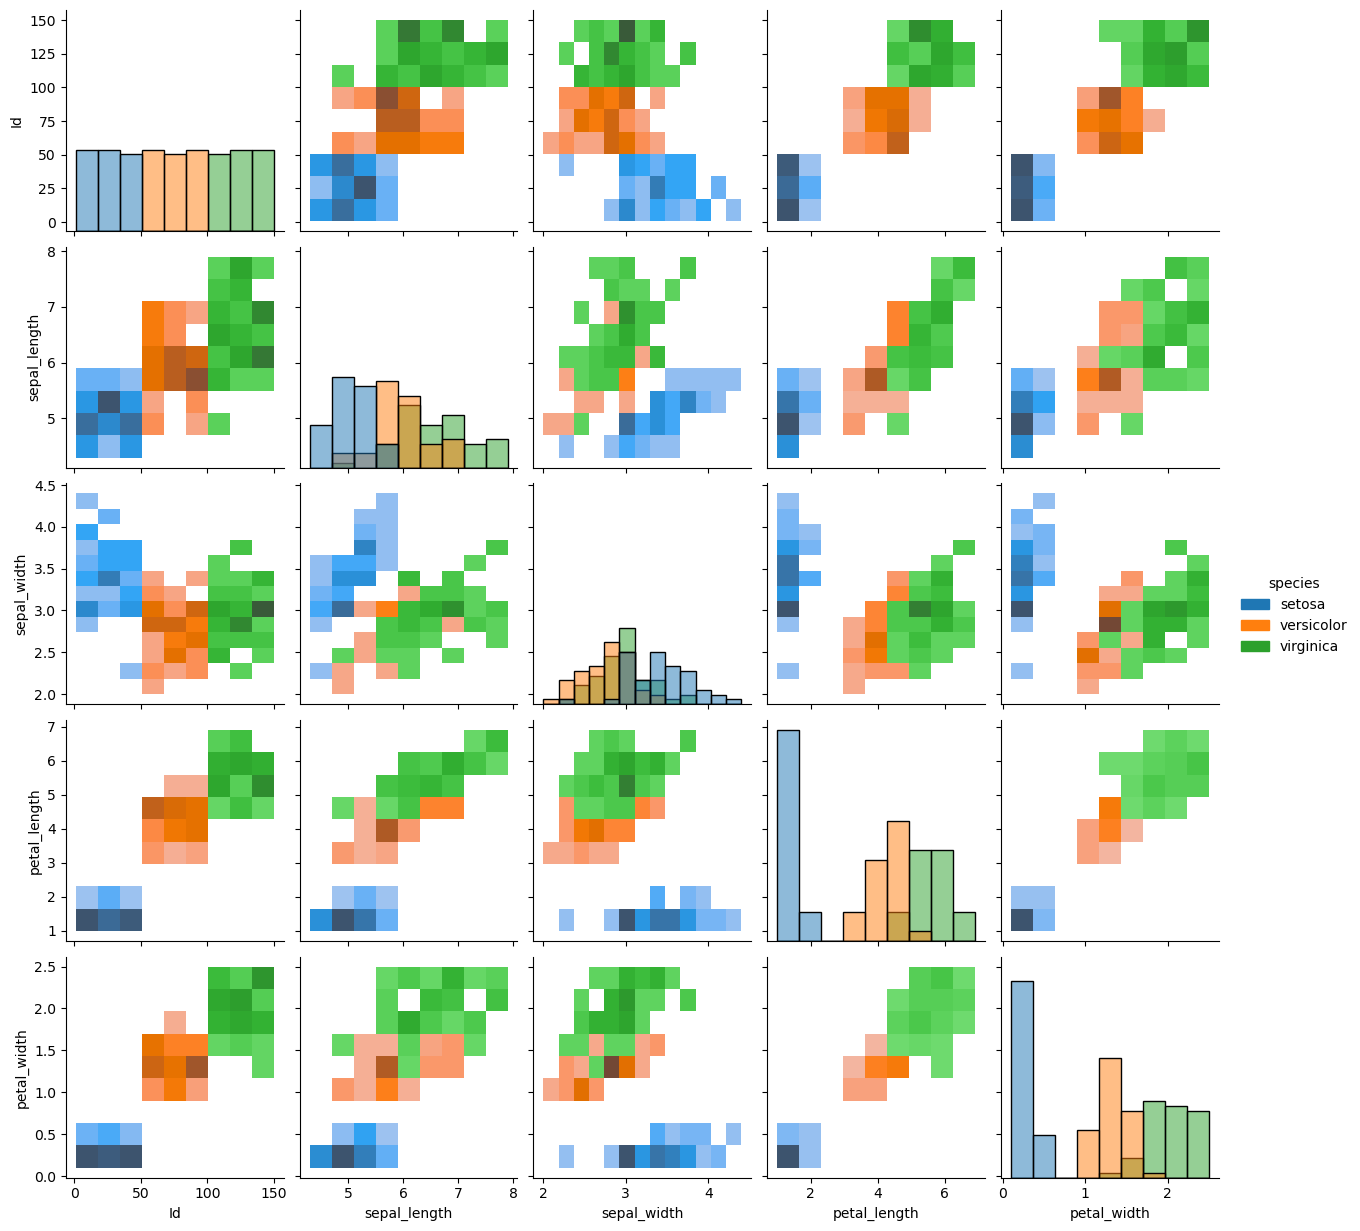

In [33]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='hist')

<Figure size 1700x600 with 0 Axes>

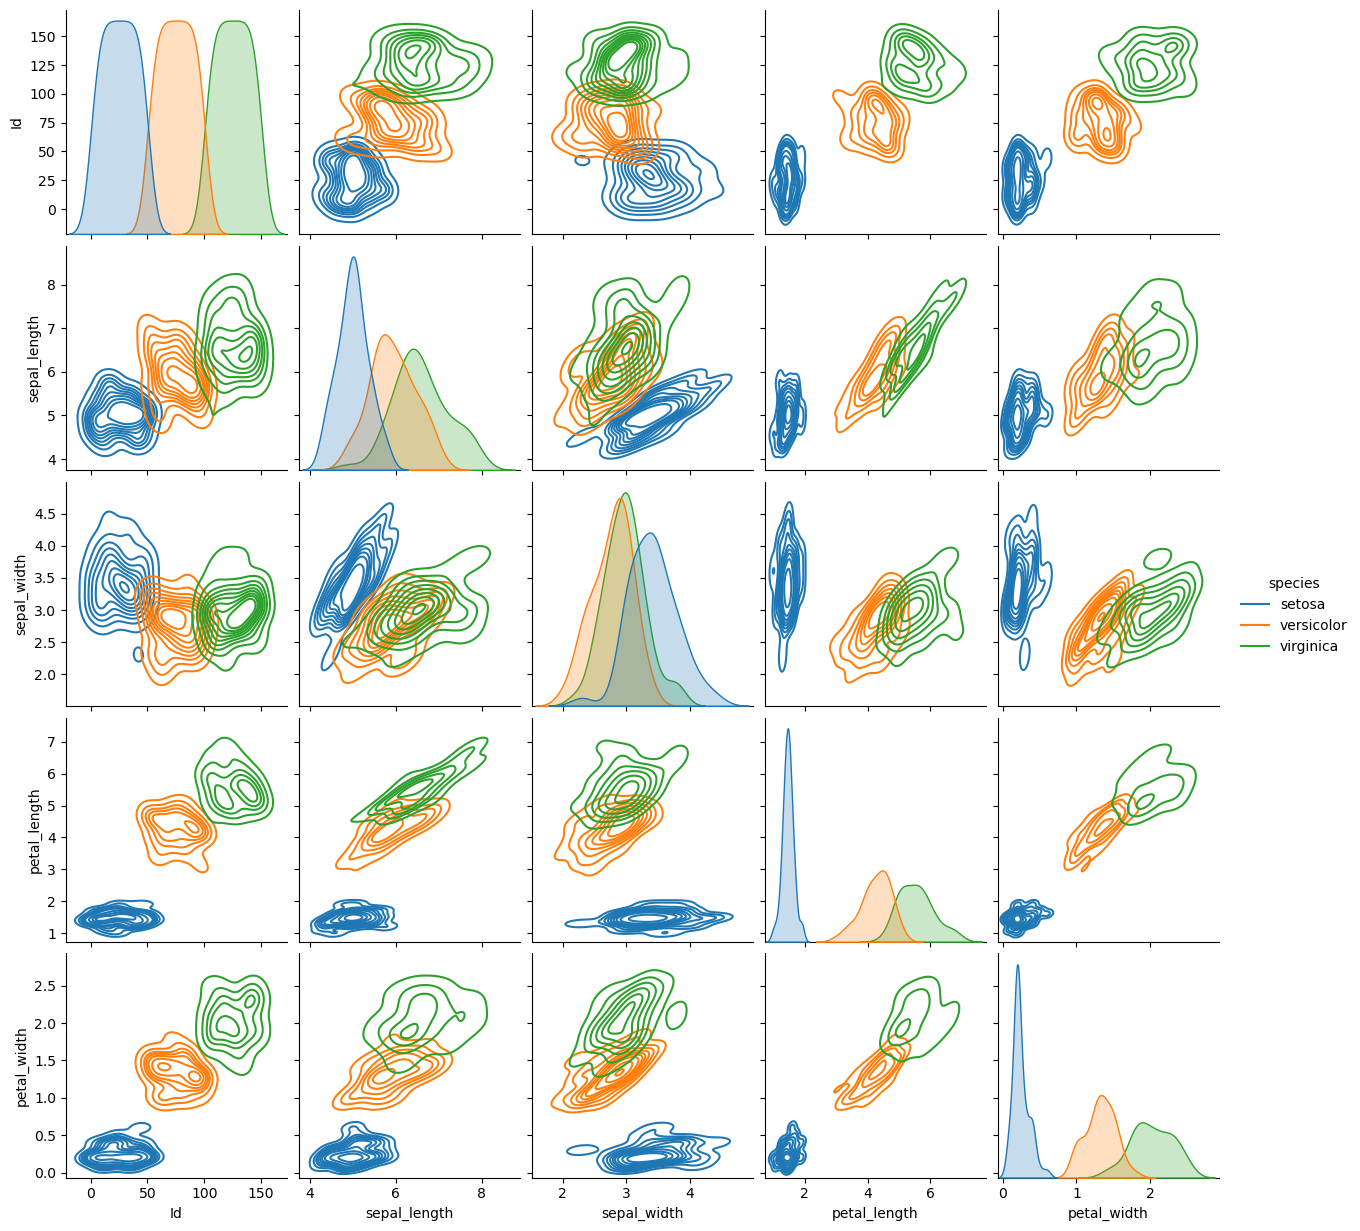

In [35]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='kde')

<Axes: title={'center': 'Species'}>

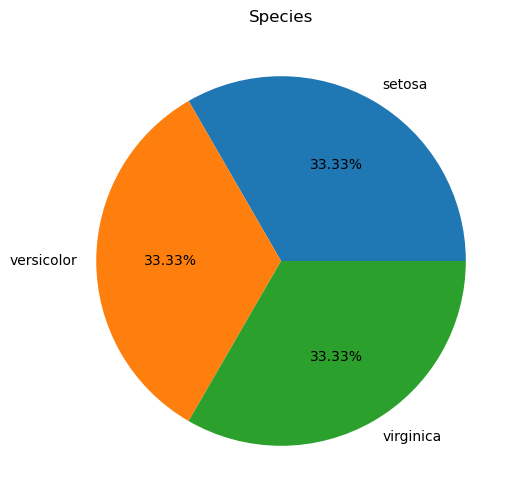

In [37]:
plt.figure(figsize=(17,6))
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

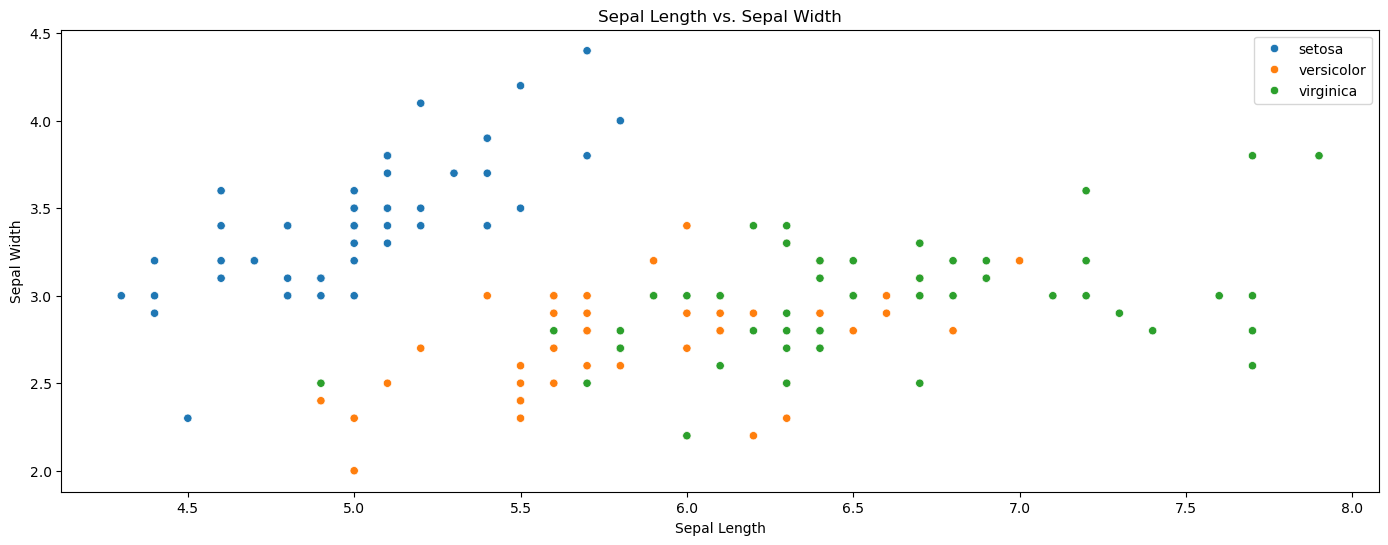

In [39]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

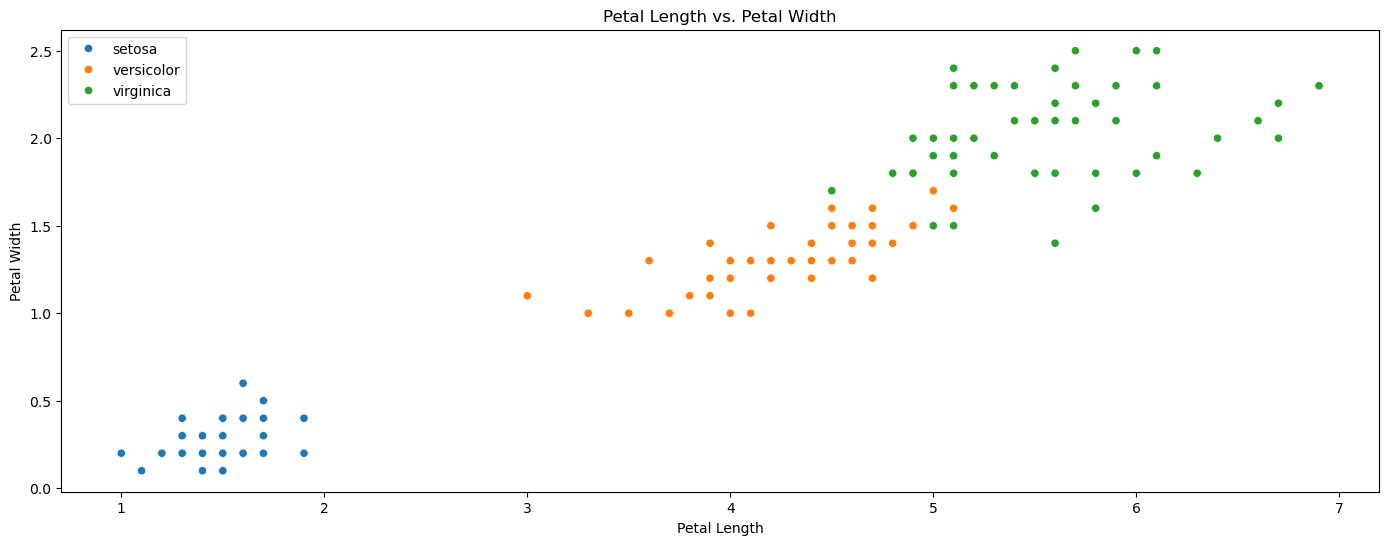

In [41]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

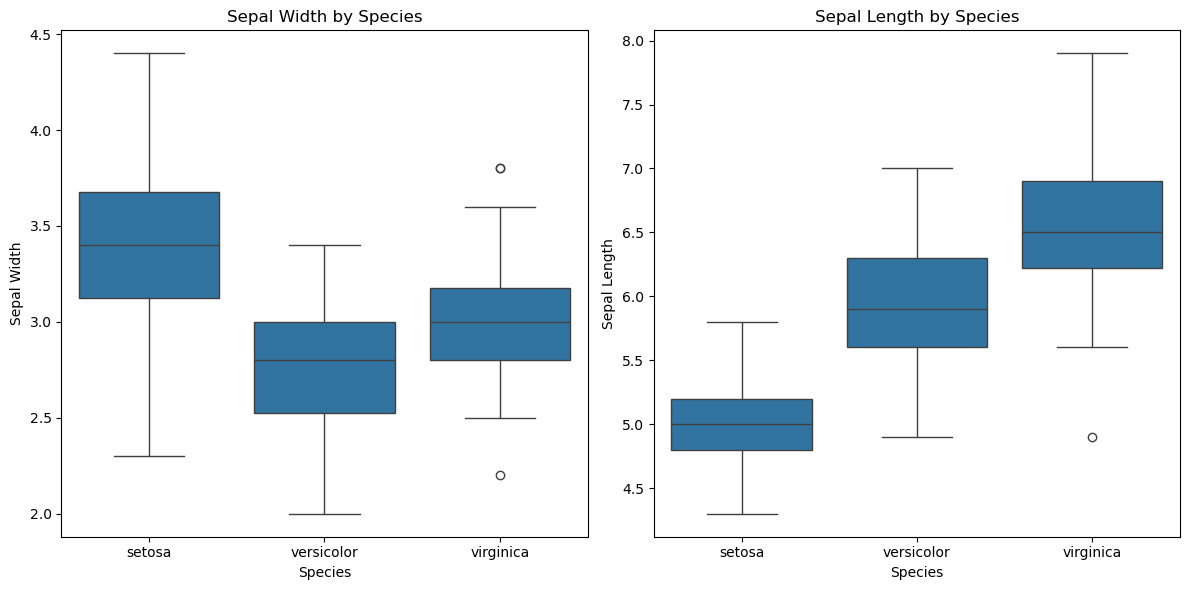

In [43]:
# Create subplots for sepal width and sepal length
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Box plot for sepal width
sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')
# Box plot for sepal length
sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

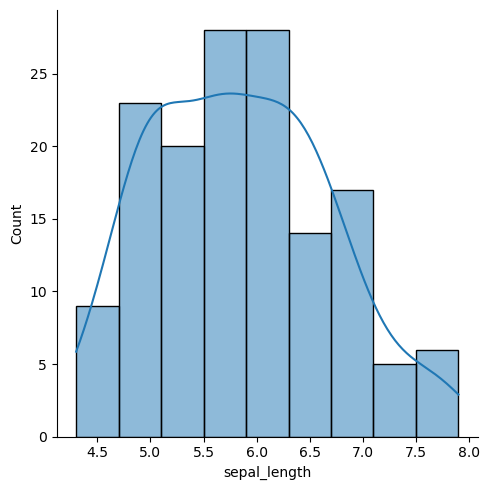

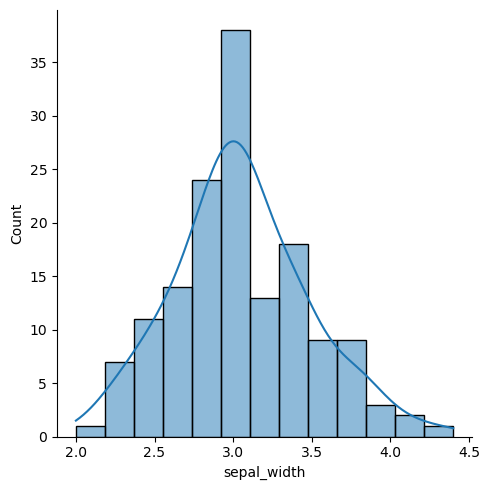

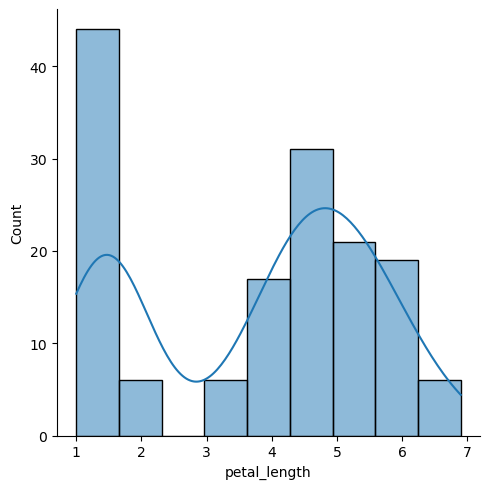

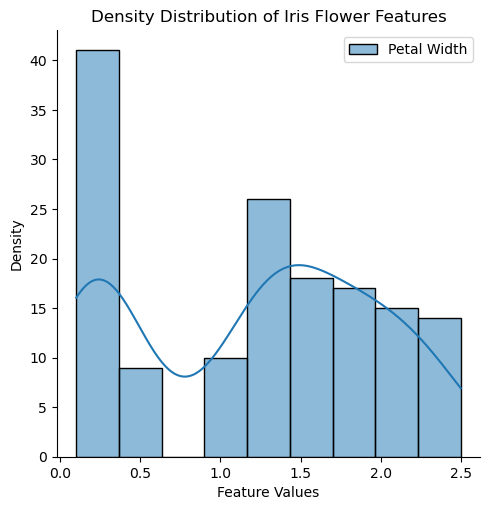

In [45]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='sepal_length', label='Sepal Length', kde=True)
sns.displot(data=df, x='sepal_width', label='Sepal Width', kde=True)
sns.displot(data=df, x='petal_length', label='Petal Length', kde=True)
sns.displot(data=df, x='petal_width', label='Petal Width', kde=True)
plt.legend()
plt.title('Density Distribution of Iris Flower Features')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

In [47]:
le = LabelEncoder()

In [49]:
df['species']=le.fit_transform(df['species'])
df

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [51]:
#Model Train & Test

In [53]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df['species'],test_size=0.2,random_state=2)

In [55]:
lor = LogisticRegression()

In [57]:
lor.fit(X_train,y_train)

C:\Users\egala\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
test = lor.predict(X_test)
for tests in test:
    print("->",tests)

-> 0
-> 0
-> 2
-> 0
-> 0
-> 2
-> 0
-> 2
-> 2
-> 0
-> 0
-> 0
-> 0
-> 0
-> 1
-> 1
-> 0
-> 1
-> 2
-> 1
-> 1
-> 1
-> 2
-> 1
-> 1
-> 0
-> 0
-> 2
-> 0
-> 2


In [61]:
lor.score(X_test,y_test)

1.0

In [63]:
y_test.values

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [65]:
#Using Feature Scaling

In [67]:
minmax = MinMaxScaler()

In [69]:
x_train= minmax.fit_transform(X_train)
x_test= minmax.fit_transform(X_test)

In [71]:
lor.fit(x_train,y_train)

LogisticRegression()

In [73]:
test1= lor.predict(x_test)
for test2 in test1:
    print("->",test2)

-> 0
-> 0
-> 2
-> 0
-> 0
-> 2
-> 0
-> 2
-> 2
-> 0
-> 0
-> 0
-> 0
-> 0
-> 2
-> 1
-> 0
-> 1
-> 2
-> 1
-> 2
-> 1
-> 2
-> 1
-> 1
-> 0
-> 0
-> 2
-> 0
-> 2


In [75]:
lor.score(x_test,y_test)

0.9333333333333333

In [77]:
#Thank You